In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression

In [51]:
df_islander = pd.read_csv("Islander_data.csv")

In [3]:
df_islander.head()

,first_name,last_name,age,Happy_Sad_group,Dosage,Drug,Mem_Score_Before,Mem_Score_After,Diff
0,Bastian,Carrasco,25,H,1,A,63.5,61.2,-2.3
1,Evan,Carrasco,52,S,1,A,41.6,40.7,-0.9
2,Florencia,Carrasco,29,H,1,A,59.7,55.1,-4.6
3,Holly,Carrasco,50,S,1,A,51.7,51.2,-0.5
4,Justin,Carrasco,52,H,1,A,47.0,47.1,0.1


In [4]:
A_mean = df_islander[df_islander["Drug"] == "A"]["Diff"].mean()
S_mean = df_islander[df_islander["Drug"] == "S"]["Diff"].mean()
T_mean = df_islander[df_islander["Drug"] == "T"]["Diff"].mean()
overall_mean = df_islander["Diff"].mean()

In [5]:
len(df_islander["Drug"].unique())

3

In [6]:
SSTotal = np.sum((df_islander["Diff"] - overall_mean)**2)
SSTreat = df_islander[df_islander["Drug"] == "T"]["Diff"].count() * (T_mean - overall_mean)**2 + df_islander[df_islander["Drug"] == "A"]["Diff"].count() * (A_mean - overall_mean)**2 + df_islander[df_islander["Drug"] == "S"]["Diff"].count() * (S_mean - overall_mean)**2
SSError = np.sum((df_islander[df_islander["Drug"] == "T"]["Diff"] - T_mean)**2) + np.sum((df_islander[df_islander["Drug"] == "A"]["Diff"] - A_mean)**2) + np.sum((df_islander[df_islander["Drug"] == "S"]["Diff"] - S_mean)**2)

In [7]:
SS = np.array([SSTreat, SSError, SSTotal])
DF = np.array([len(df_islander["Drug"].unique()) - 1, df_islander.shape[0] - len(df_islander["Drug"].unique()), df_islander.shape[0] - 1])

In [8]:
SSTotal - SSTreat

18480.525755383926

In [9]:
print([SS, DF])

[array([ 4304.78515371, 18480.52575538, 22785.31090909]), array([  2, 195, 197])]


In [10]:
MS = SS/DF

In [11]:
F = MS[0]/MS[1]

In [12]:
F

22.711288522955336

In [13]:
P_value = 1 - f.cdf(F, DF[0], DF[1])

In [14]:
P_value

1.3592142966700749e-09

In [15]:
np.column_stack([SS, DF, MS, [F, 0, 0]])

array([[4.30478515e+03, 2.00000000e+00, 2.15239258e+03, 2.27112885e+01],
       [1.84805258e+04, 1.95000000e+02, 9.47719270e+01, 0.00000000e+00],
       [2.27853109e+04, 1.97000000e+02, 1.15661477e+02, 0.00000000e+00]])

<AxesSubplot:xlabel='Drug', ylabel='Diff'>

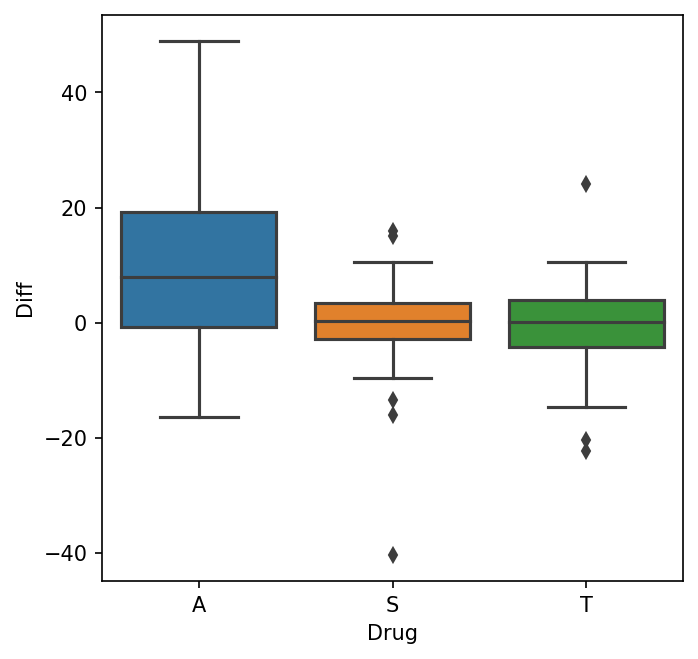

In [18]:
fig, ax = plt.subplots(figsize = (5,5), dpi = 150)
sns.boxplot(data=df_islander, x="Drug", y="Diff")

<AxesSubplot:title={'center':'Diff'}, xlabel='Drug'>

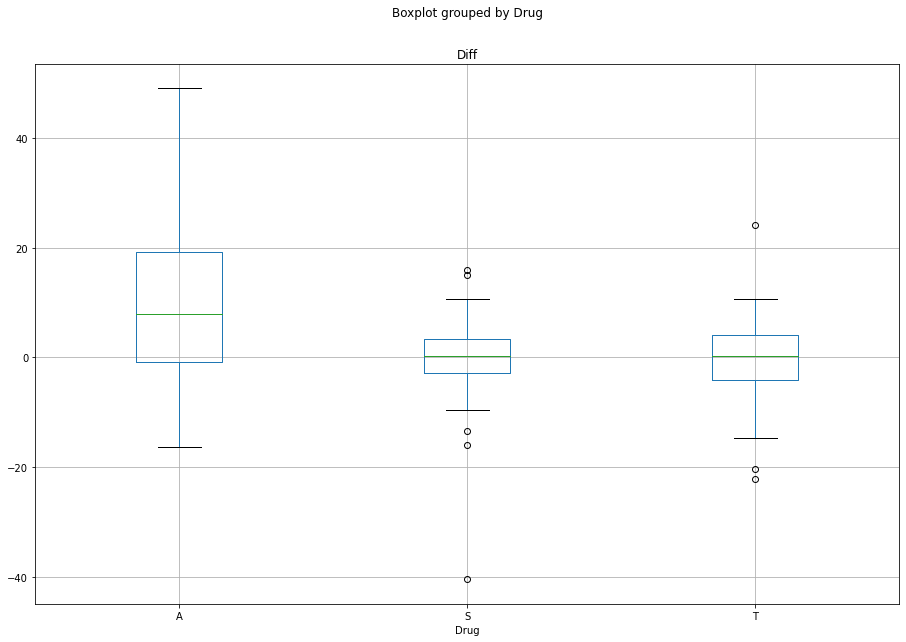

In [24]:

df_islander.boxplot(by = "Drug", column = ["Diff"], figsize=(15, 10)) 

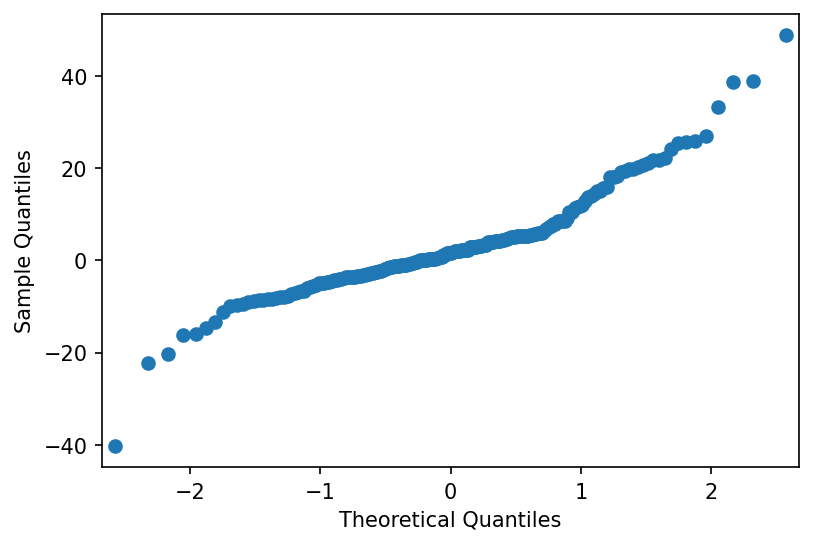

In [27]:
fig, ax = plt.subplots(dpi = 150)

sm.qqplot(df_islander["Diff"], ax = ax)
plt.show()

In [58]:
island_model = LinearRegression()
drug_dummies = pd.get_dummies(df_islander["Drug"])
df_islander = df_islander.join(drug_dummies)
island_model.fit(df_islander.loc[:,["A", "T", "S"]], df_islander.loc[:,"Diff"])

LinearRegression()

In [59]:
island_model.coef_

array([1.30857839e+15, 1.30857839e+15, 1.30857839e+15])

In [60]:
df_islander

,first_name,last_name,age,Happy_Sad_group,Dosage,Drug,Mem_Score_Before,Mem_Score_After,Diff,A,S,T
0,Bastian,Carrasco,25,H,1,A,63.5,61.2,-2.3,1,0,0
1,Evan,Carrasco,52,S,1,A,41.6,40.7,-0.9,1,0,0
2,Florencia,Carrasco,29,H,1,A,59.7,55.1,-4.6,1,0,0
3,Holly,Carrasco,50,S,1,A,51.7,51.2,-0.5,1,0,0
4,Justin,Carrasco,52,H,1,A,47.0,47.1,0.1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
193,Jacob,Novak,52,H,3,T,71.3,74.3,3.0,0,0,1
194,Teo,Steiner,41,S,3,T,72.5,70.4,-2.1,0,0,1
195,Alexander,Takahashi,54,S,3,T,30.8,33.1,2.3,0,0,1
196,Alexandere,Takahashi,40,H,3,T,53.6,53.8,0.2,0,0,1


In [63]:
island_lm = ols('Diff ~ C(Drug, Sum)', data = df_islander).fit()

In [65]:
sm.stats.anova_lm(island_lm, typ=2)

,sum_sq,df,F,PR(>F)
"C(Drug, Sum)",4304.785154,2.0,22.711289,1.359214e-09
Residual,18480.525755,195.0,NaN,NaN


In [68]:
print(island_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                   Diff   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     22.71
Date:                Thu, 15 Sep 2022   Prob (F-statistic):           1.36e-09
Time:                        14:01:14   Log-Likelihood:                -730.03
No. Observations:                 198   AIC:                             1466.
Df Residuals:                     195   BIC:                             1476.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.9037      0.69

In [66]:
df_DrugA = df_islander[df_islander.loc[:,"Drug"] == "A"]

In [69]:
drugA_lm = ols('Diff ~ C(Dosage, Sum)', data = df_DrugA).fit()
print(drugA_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                   Diff   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     34.70
Date:                Thu, 15 Sep 2022   Prob (F-statistic):           6.20e-11
Time:                        14:01:47   Log-Likelihood:                -243.11
No. Observations:                  67   AIC:                             492.2
Df Residuals:                      64   BIC:                             498.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               9.6090    

In [70]:
sm.stats.anova_lm(drugA_lm, typ = 2)

,sum_sq,df,F,PR(>F)
"C(Dosage, Sum)",6031.864824,2.0,34.70244,6.198180e-11
Residual,5562.135474,64.0,NaN,NaN


In [79]:
drugA_lm.hat_diag

AttributeError: 'OLSResults' object has no attribute 'hat_diag'

In [77]:
from statsmodels.stats.outliers_influence import OLSInfluence
OLSInfluence(drugA_lm).summary_frame() 

,dfb_Intercept,"dfb_C(Dosage, Sum)[S.1]","dfb_C(Dosage, Sum)[S.2]",cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,-0.034389,-0.048995,0.024228,0.001236,-0.285641,0.043478,-0.060899,-0.283582,-0.060460
1,-0.015895,-0.022646,0.011198,0.000264,-0.132091,0.043478,-0.028162,-0.131073,-0.027945
2,-0.064865,-0.092416,0.045699,0.004384,-0.537902,0.043478,-0.114681,-0.534893,-0.114040
3,-0.010615,-0.015123,0.007478,0.000118,-0.088220,0.043478,-0.018809,-0.087533,-0.018662
4,-0.002697,-0.003842,0.001900,0.000008,-0.022413,0.043478,-0.004778,-0.022237,-0.004741
...,...,...,...,...,...,...,...,...,...
62,-0.236298,0.168330,0.166477,0.052985,-1.827040,0.045455,-0.398693,-1.861916,-0.406303
63,0.058981,-0.042016,-0.041553,0.003471,0.467614,0.045455,0.102042,0.464741,0.101415
64,-0.037919,0.027012,0.026715,0.001437,-0.300930,0.045455,-0.065668,-0.298781,-0.065199
65,0.045101,-0.032128,-0.031774,0.002032,0.357822,0.045455,0.078083,0.355371,0.077548


In [78]:
OLSInfluence(island_lm).summary_frame() 

,dfb_Intercept,"dfb_C(Drug, Sum)[S.A]","dfb_C(Drug, Sum)[S.S]",cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,-0.086024,-0.122117,0.060830,0.007495,-1.218169,0.014925,-0.149946,-1.219691,-0.150134
1,-0.075727,-0.107500,0.053549,0.005818,-1.073274,0.014925,-0.132111,-1.073694,-0.132163
2,-0.103003,-0.146221,0.072837,0.010710,-1.456211,0.014925,-0.179247,-1.460435,-0.179767
3,-0.072789,-0.103330,0.051472,0.005378,-1.031875,0.014925,-0.127015,-1.032048,-0.127036
4,-0.068387,-0.097081,0.048359,0.004750,-0.969777,0.014925,-0.119371,-0.969629,-0.119353
...,...,...,...,...,...,...,...,...,...
193,0.026947,-0.019127,-0.019055,0.000718,0.371400,0.015385,0.046425,0.370578,0.046322
194,-0.011356,0.008060,0.008030,0.000128,-0.156555,0.015385,-0.019569,-0.156163,-0.019520
195,0.021687,-0.015393,-0.015335,0.000465,0.298936,0.015385,0.037367,0.298237,0.037280
196,0.005914,-0.004198,-0.004182,0.000035,0.081542,0.015385,0.010193,0.081334,0.010167
